In [13]:
from numpy import *

def loadDataSet(fileName):      #general function to parse tab -delimited floats
    dataMat = []                #assume last column is target value
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float,curLine)) #map all elements to float()
        dataMat.append(fltLine)
    return dataMat

def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2))) #la.norm(vecA-vecB)

def randCent(dataSet, k):
    n = shape(dataSet)[1]
    print('n:',n)
    centroids = mat(zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j]) 
        maxJ = max(dataSet[:,j])
        rangeJ = float(maxJ-minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
    return centroids

In [14]:
datMat=mat(loadDataSet('testSet.txt'))
datMat[:20]

matrix([[ 1.658985,  4.285136],
        [-3.453687,  3.424321],
        [ 4.838138, -1.151539],
        [-5.379713, -3.362104],
        [ 0.972564,  2.924086],
        [-3.567919,  1.531611],
        [ 0.450614, -3.302219],
        [-3.487105, -1.724432],
        [ 2.668759,  1.594842],
        [-3.156485,  3.191137],
        [ 3.165506, -3.999838],
        [-2.786837, -3.099354],
        [ 4.208187,  2.984927],
        [-2.123337,  2.943366],
        [ 0.704199, -0.479481],
        [-0.39237 , -3.963704],
        [ 2.831667,  1.574018],
        [-0.790153,  3.343144],
        [ 2.943496, -3.357075],
        [-3.195883, -2.283926]])

In [15]:
min(datMat[:, 0])

matrix([[-5.379713]])

In [16]:
min(datMat[:, 1])

matrix([[-4.232586]])

In [17]:
max(datMat[:, 1])

matrix([[5.1904]])

In [18]:
max(datMat[:, 0])

matrix([[4.838138]])

In [19]:
randCent(datMat, 2)

n: 2


matrix([[ 1.82743088, -2.74116135],
        [ 2.21322667, -1.9371619 ]])

In [20]:
distEclud(datMat[0], datMat[1])

5.184632816681332

In [23]:
def kMeans(dataSet, k, distMeans=distEclud, createCent=randCent):
    m = shape(dataSet)[0]
    clusterAssment = mat(zeros((m,2)))#create mat to assign data points 
                                      #to a centroid, also holds SE of each point
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = inf; minIndex = -1
            for j in range(k):
                distJ = distMeans(centroids[j,:],dataSet[i,:])
            if distJ < minDist:
                minDist = distJ
                minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        print(centroids)
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = mean(ptsInClust, axis=0) #assign centroid to mean 
    return centroids, clusterAssment

In [24]:
myCentroids, clustAssing = kMeans(datMat, 4)

n: 2
[[ 1.1842938  -2.91805192]
 [ 4.19591572  2.5065043 ]
 [-4.27688641  0.28582366]
 [ 3.83320176  1.61180022]]
[[        nan         nan]
 [        nan         nan]
 [        nan         nan]
 [-0.10361321  0.0543012 ]]


/opt/homebrew/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:445: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
/opt/homebrew/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


In [25]:
myCentroids

matrix([[        nan,         nan],
        [        nan,         nan],
        [        nan,         nan],
        [-0.10361321,  0.0543012 ]])

In [26]:
clustAssing

matrix([[ 3.        , 21.00671556],
        [ 3.        , 22.58002783],
        [ 3.        , 25.87495563],
        [ 3.        , 39.50905346],
        [ 3.        ,  9.39382219],
        [ 3.        , 14.18385883],
        [ 3.        , 11.57339566],
        [ 3.        , 14.61190847],
        [ 3.        , 10.05931364],
        [ 3.        , 19.15976499],
        [ 3.        , 27.12318508],
        [ 3.        , 17.14523101],
        [ 3.        , 27.18018865],
        [ 3.        , 12.4259796 ],
        [ 3.        ,  0.93748401],
        [ 3.        , 16.22774627],
        [ 3.        , 10.92540908],
        [ 3.        , 11.28782384],
        [ 3.        , 20.92236213],
        [ 3.        , 15.02943888],
        [ 3.        , 13.9108238 ],
        [ 3.        ,  9.08132027],
        [ 3.        ,  9.1039841 ],
        [ 3.        , 18.91193663],
        [ 3.        , 18.1832729 ],
        [ 3.        ,  7.24620517],
        [ 3.        , 11.71807918],
        [ 3.        , 25.874

In [27]:
import matplotlib
import matplotlib.pyplot as plt
def showPlt(datMat, alg=kMeans, numClust=4):
    myCentroids, clustAssing = alg(datMat, numClust)
    fig = plt.figure()
    rect=[0.1,0.1,0.8,0.8]
    scatterMarkers=['s', 'o', '^', '8', 'p', \
                    'd', 'v', 'h', '>', '<']
    axprops = dict(xticks=[], yticks=[])
    ax0=fig.add_axes(rect, label='ax0', **axprops)
    ax1=fig.add_axes(rect, label='ax1', frameon=False)
    for i in range(numClust):
        ptsInCurrCluster = datMat[nonzero(clustAssing[:,0].A==i)[0],:]
        markerStyle = scatterMarkers[i % len(scatterMarkers)]
        ax1.scatter(ptsInCurrCluster[:,0].flatten().A[0], ptsInCurrCluster[:,1].flatten().A[0], marker=markerStyle, s=90)
    ax1.scatter(myCentroids[:,0].flatten().A[0], myCentroids[:,1].flatten().A[0], marker='+', s=300)
    plt.show()

n: 2
[[-3.43269665  1.90844007]
 [ 4.1716264   3.85194792]
 [ 2.7838267   2.6375598 ]
 [ 1.31339739 -0.81971048]]
[[        nan         nan]
 [        nan         nan]
 [        nan         nan]
 [-0.10361321  0.0543012 ]]


/opt/homebrew/lib/python3.9/site-packages/numpy/matrixlib/defmatrix.py:445: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
/opt/homebrew/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


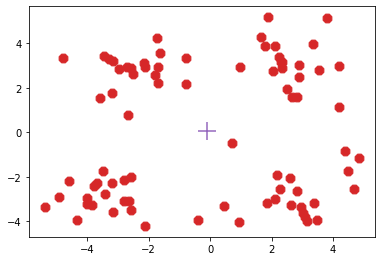

In [28]:
showPlt(datMat)